In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif

In [2]:
df = pd.read_csv('/Users/bryanzhang/Desktop/career/projects/harmonic_horizons/data/tracks2.csv')

In [3]:
df.dropna(axis=0, how='any', inplace=True)
removed_cols = ['Unnamed: 0', 'type', 'uri', 'track_href', 'analysis_url', 'id']
df = df.drop(columns=removed_cols)

song_counts = df['name'].value_counts()
duplicate_songs = song_counts[song_counts > 1].index

track_df = df[~df['name'].isin(duplicate_songs)]
track_df = track_df.set_index('name')

In [4]:
def adjust_time(time):
    return time/1000

track_df['duration_ms'] = track_df['duration_ms'].apply(adjust_time)
track_df = track_df.rename(columns={'duration_ms': 'duration_s'})

In [5]:
mood_distribution = track_df.groupby('mood').describe()
mood_distribution

danceability                                                      \
                count      mean       std     min    25%     50%      75%   
mood                                                                        
angry          1810.0  0.535169  0.190345  0.0593  0.400  0.5270  0.68775   
calm           2668.0  0.397022  0.230109  0.0000  0.167  0.3880  0.59600   
happy          1365.0  0.653534  0.132937  0.1940  0.573  0.6650  0.74700   
romantic       1666.0  0.553520  0.153005  0.0000  0.450  0.5630  0.66400   
sad            1696.0  0.521008  0.145798  0.0763  0.424  0.5235  0.62325   

                 energy            ... time_signature      popularity  \
            max   count      mean  ...            75%  max      count   
mood                               ...                                  
angry     0.969  1810.0  0.832397  ...            4.0  5.0     1810.0   
calm      0.935  2668.0  0.139518  ...            4.0  5.0     2668.0   
happy     0.981  1365.0  0.715099  ...            4.0  5.0     1365.0   
romantic  0.967  1666.0  0.442518  ...            4.0  5.0     1666.0   
sad       0.945  1696.0  0.470177  ...            4.0  5.0     1696.0   

                                                              
               mean        std  min   25%   50%   75%    max  
mood                                                          
angry     41.445856  24.872780  0.0  24.0  42.0  63.0   93.0  
calm      36.865442  18.702862  0.0  26.0  42.0  51.0   83.0  
happy     56.973626  23.391527  0.0  46.0  63.0  74.0  100.0  
romantic  39.534814  26.220393  0.0  14.0  43.0  62.0   87.0  
sad       43.364387  27.872411  0.0  20.0  50.0  67.0   99.0  

[5 rows x 112 columns]

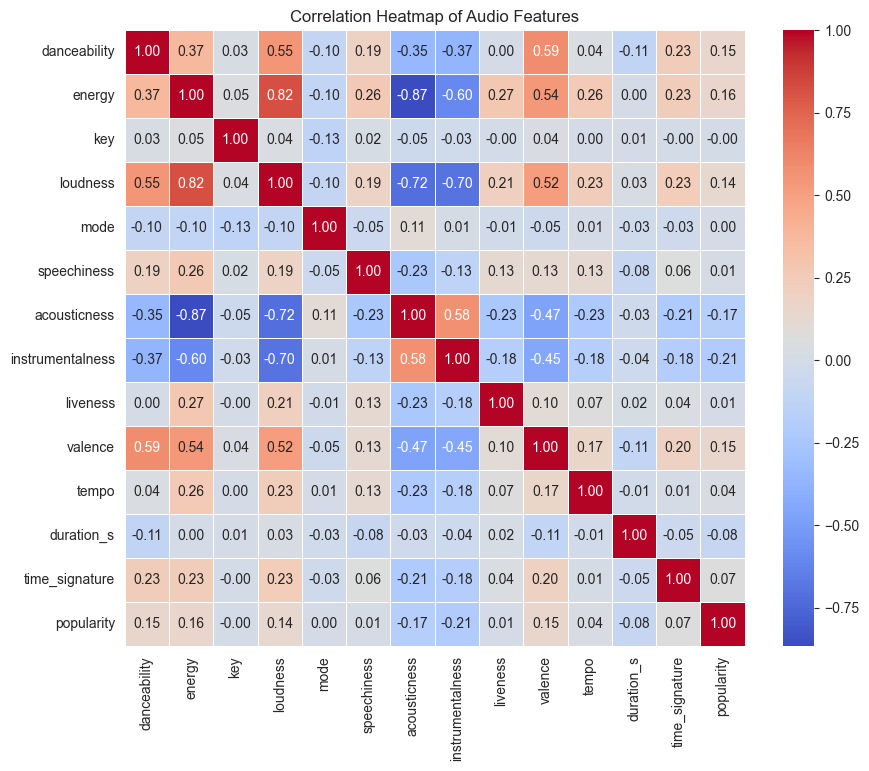

In [6]:
corr_matrix = track_df.drop(columns=['mood']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Audio Features')
plt.show()

In [7]:
X = track_df.drop(columns=['mood'])
y = track_df['mood']

F_values, P_values = f_classif(X, y)
anova_results = pd.DataFrame({'Feature': X.columns, 'F-Value': F_values, 'P-Value': P_values})

anova_results.sort_values(by='P-Value', ascending=False)

,Feature,F-Value,P-Value
2,key,2.849533,2.249135e-02
4,mode,11.731360,1.669379e-09
11,duration_s,34.061781,2.914624e-28
12,time_signature,109.175067,4.728038e-91
10,tempo,132.830448,1.718856e-110
8,liveness,146.898769,5.716947e-122
13,popularity,169.894056,1.347036e-140
0,danceability,500.624393,0.000000e+00
1,energy,4486.121500,0.000000e+00
3,loudness,3306.766482,0.000000e+00


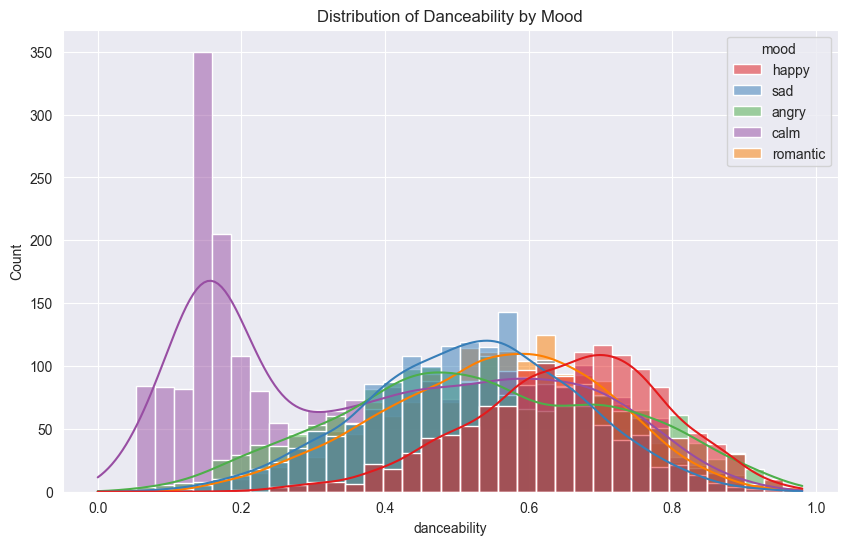

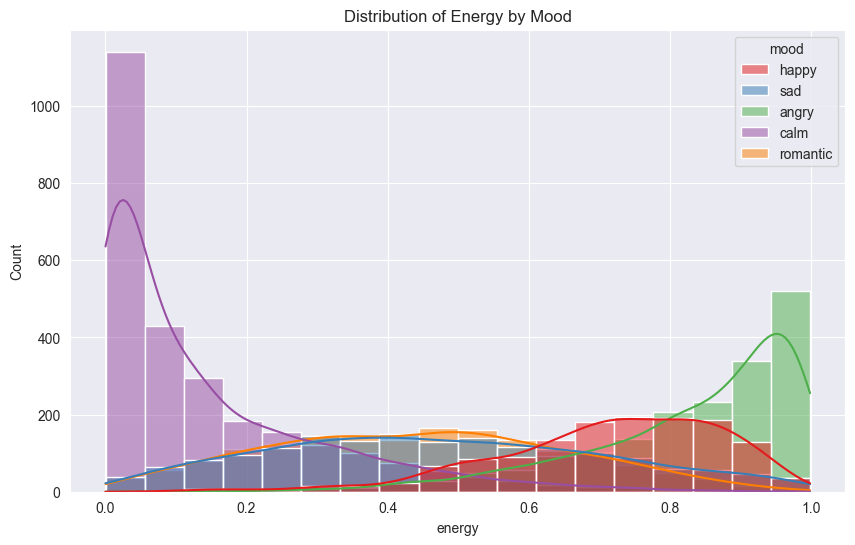

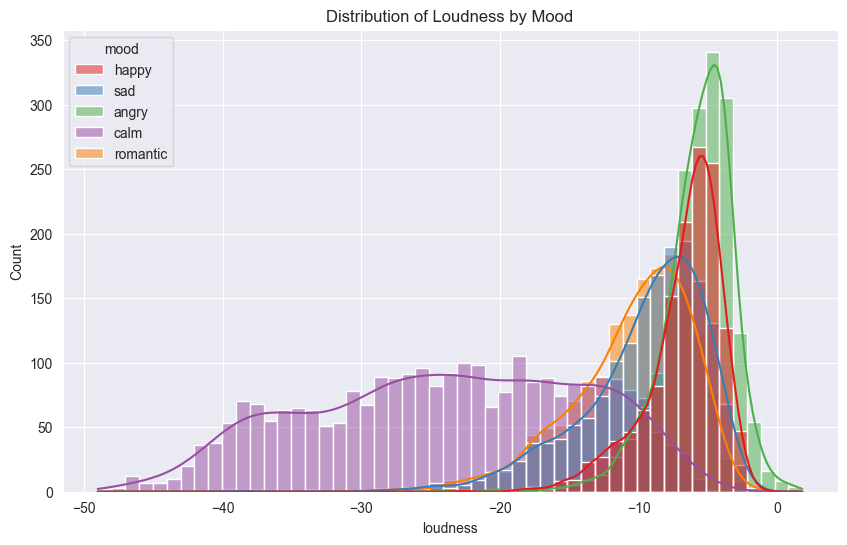

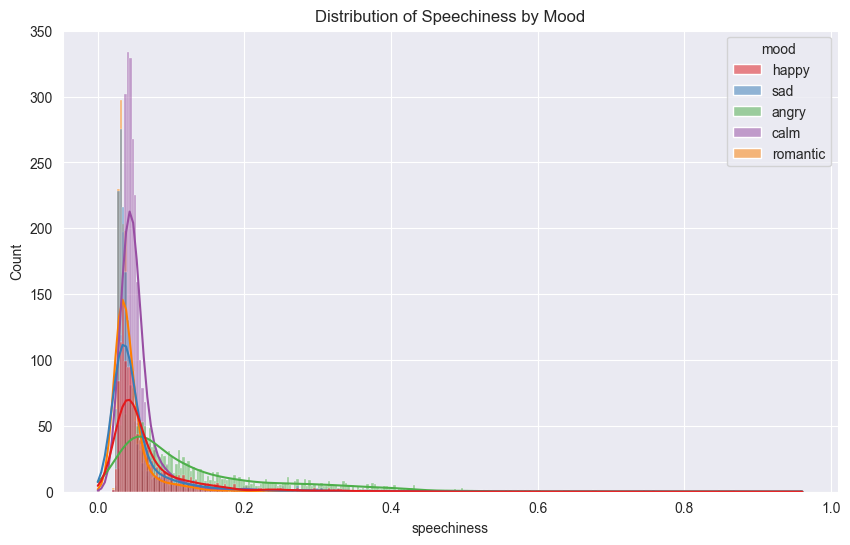

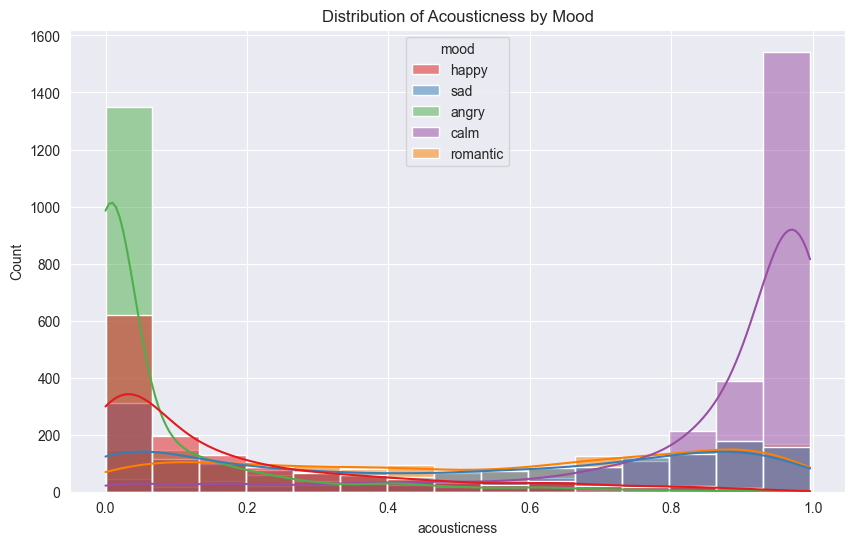

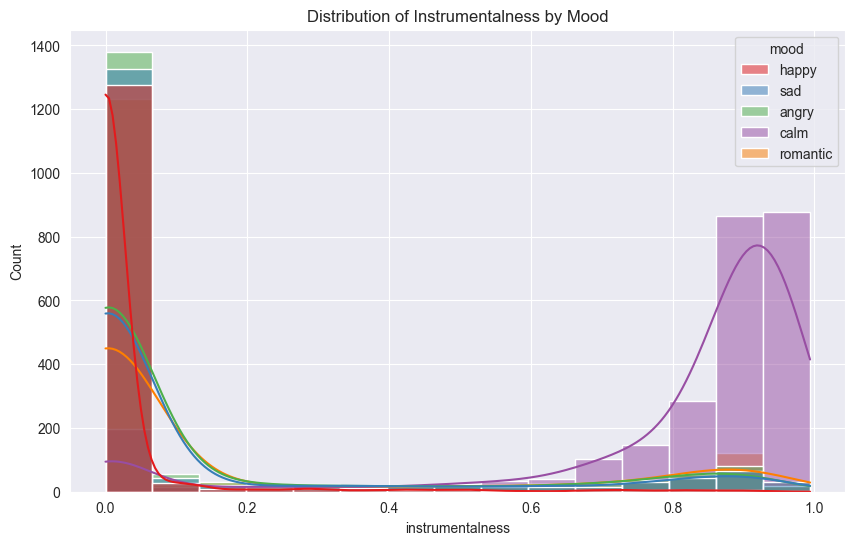

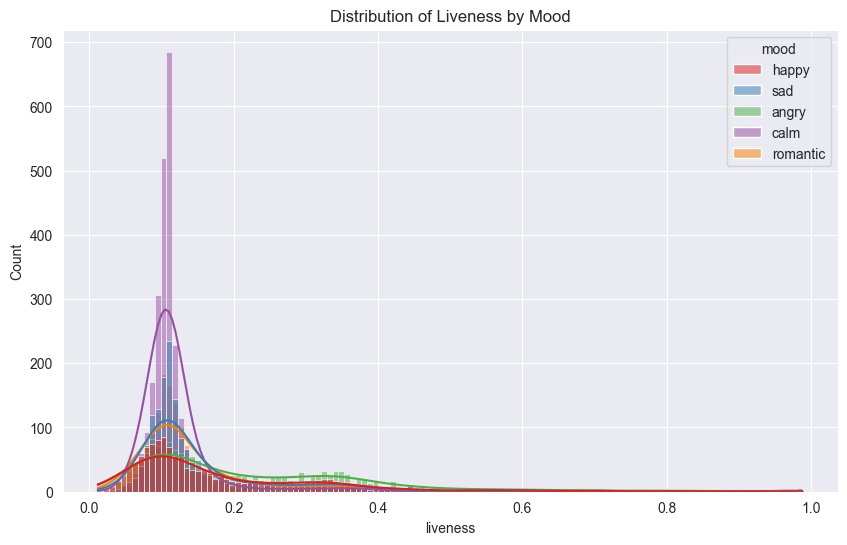

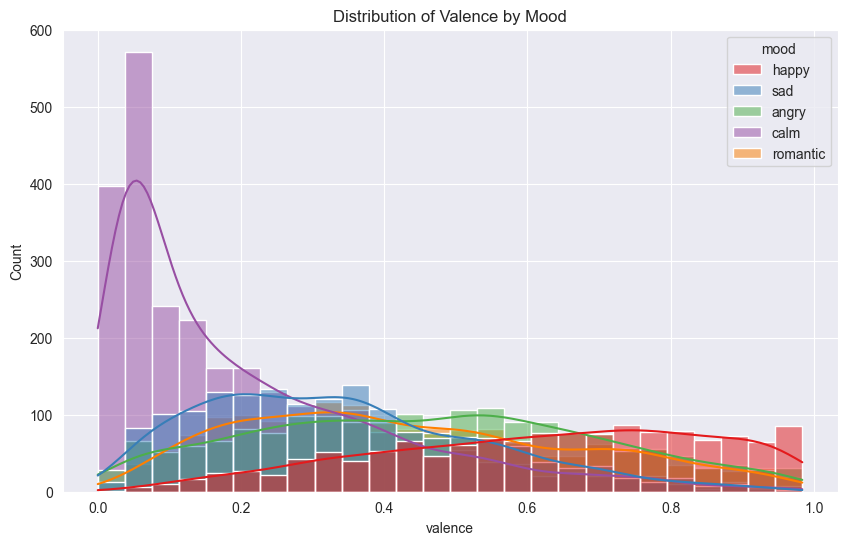

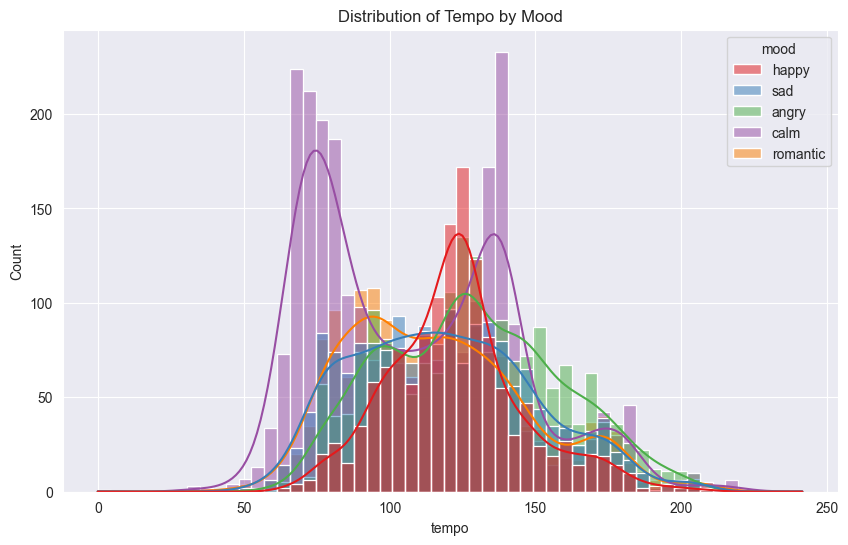

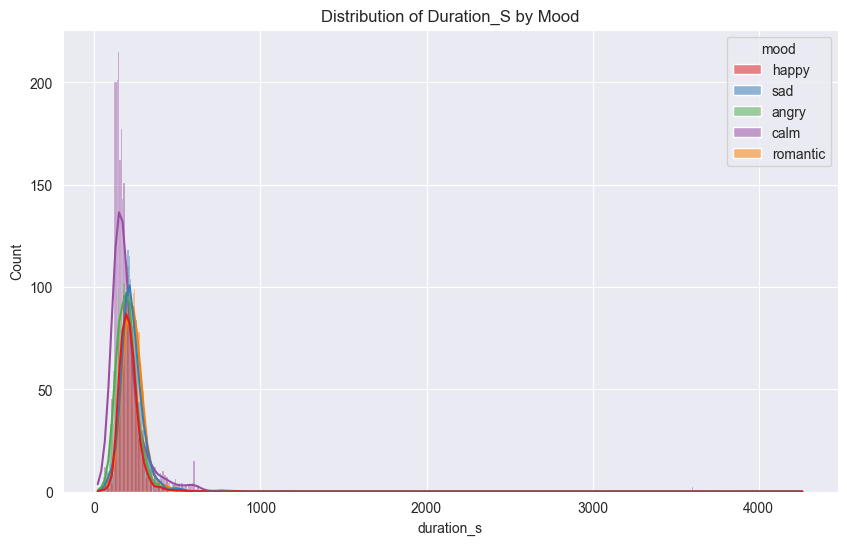

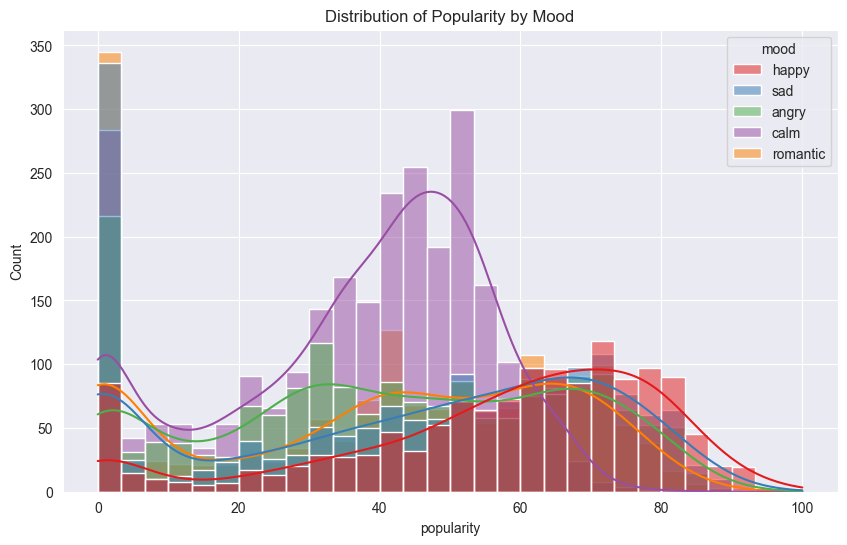

In [8]:
def create_visualization(df, vis_type, **kwargs):
    audio_features = df.drop(columns=['mood', 'key', 'time_signature', 'mode']).columns
    
    for feature in audio_features:
        plt.figure(figsize=(10, 6))
        vis_type(data=df, x=feature, **kwargs)
        
        plt.title(f'Distribution of {feature.title()} by Mood')
        plt.xlabel(f'{feature}')
        
        if vis_type == sns.histplot:
            plt.ylabel('Count')
        else:
            plt.ylabel('Value')
            plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False)
        
        plt.show()

create_visualization(track_df, sns.histplot, hue='mood', palette='Set1', kde=True)

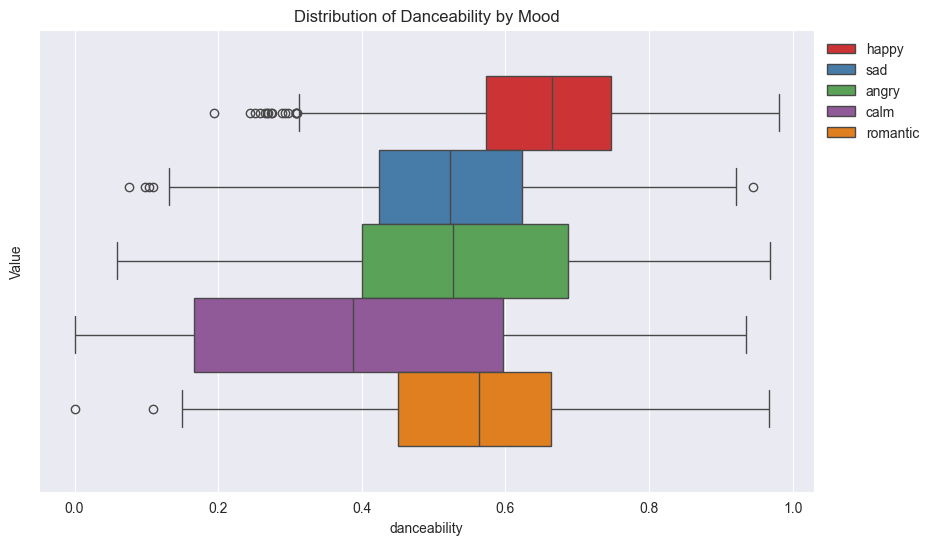

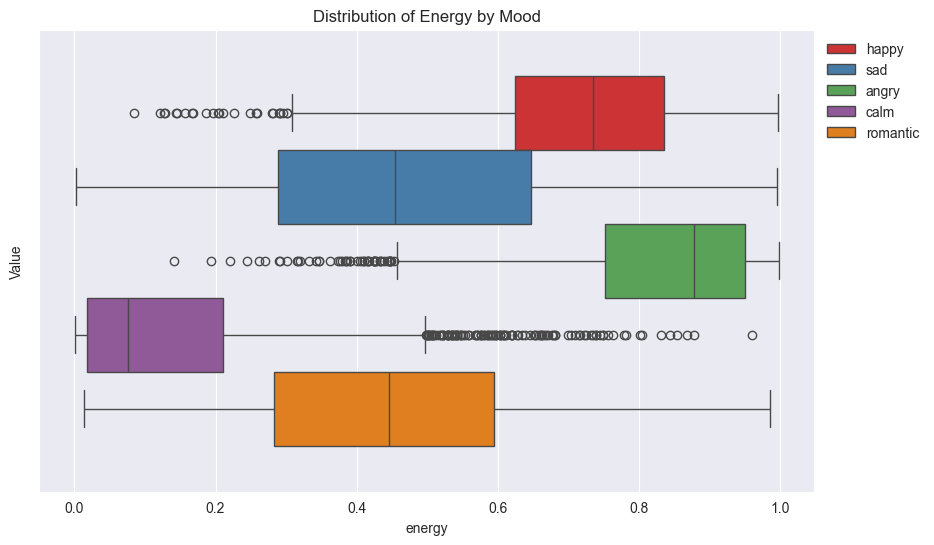

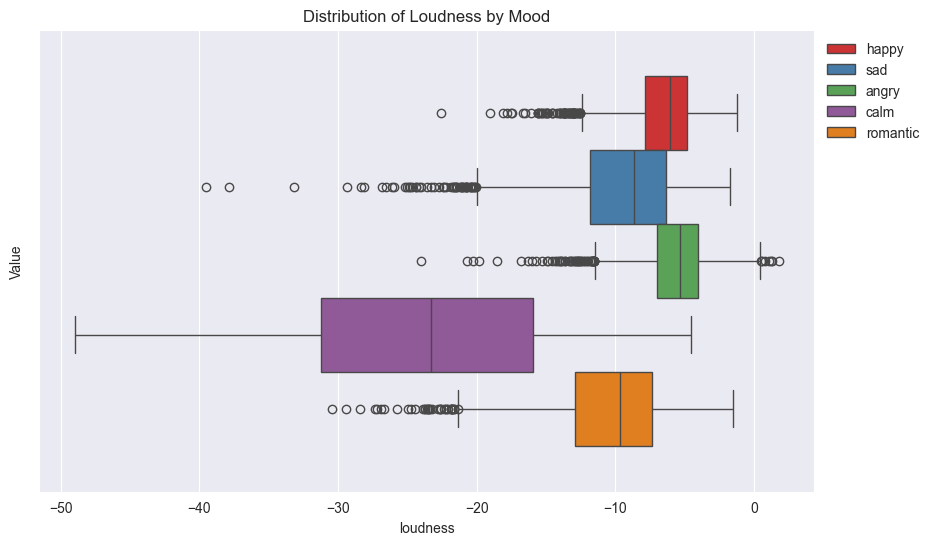

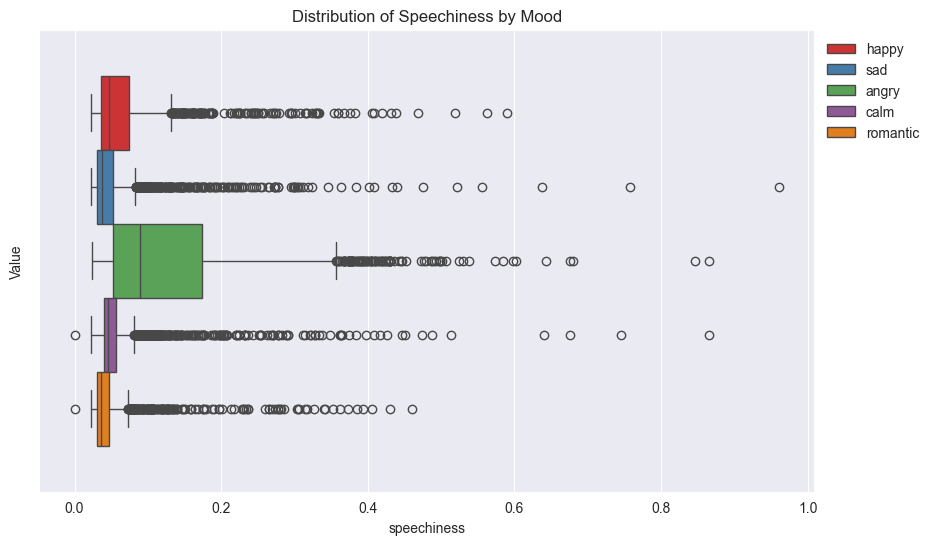

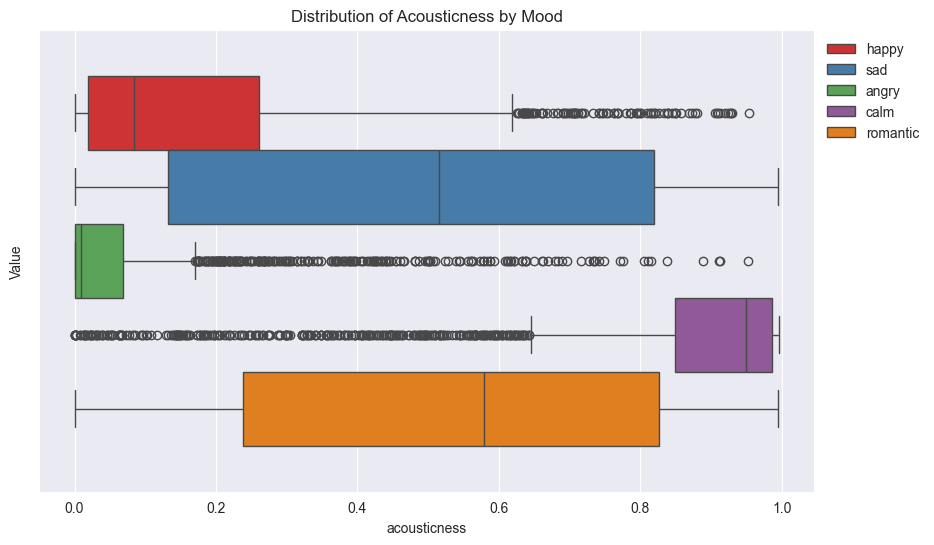

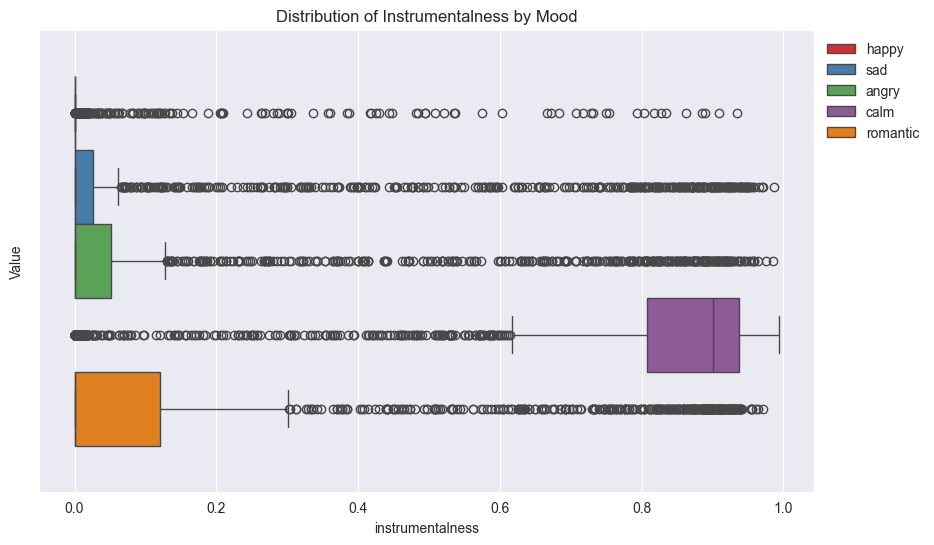

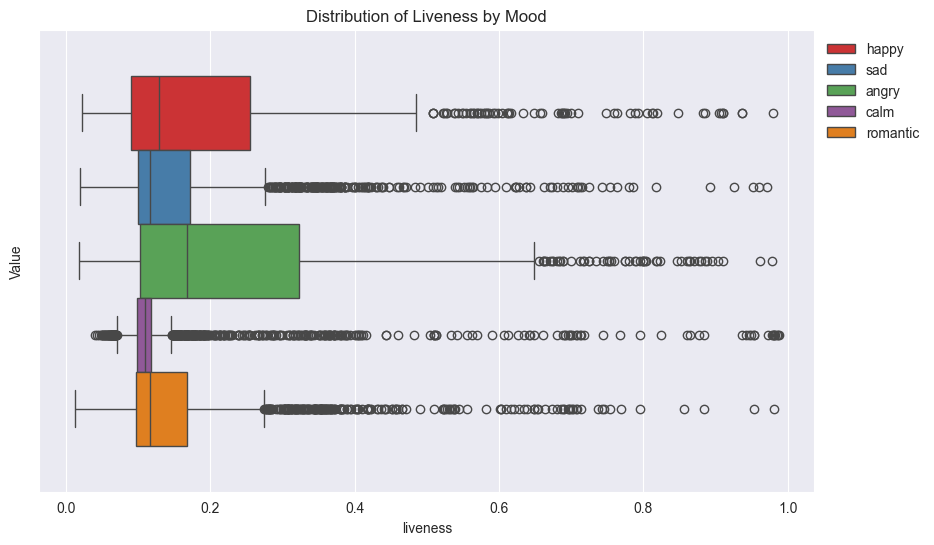

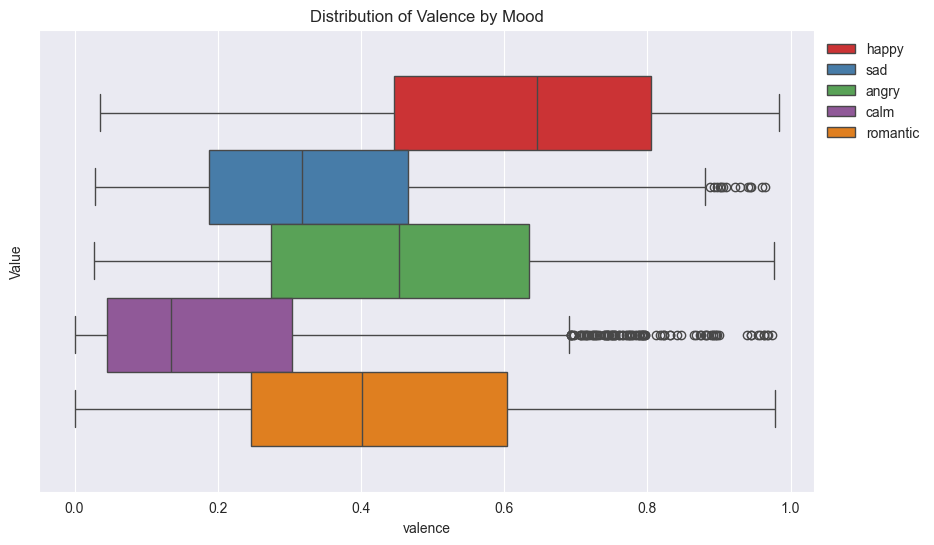

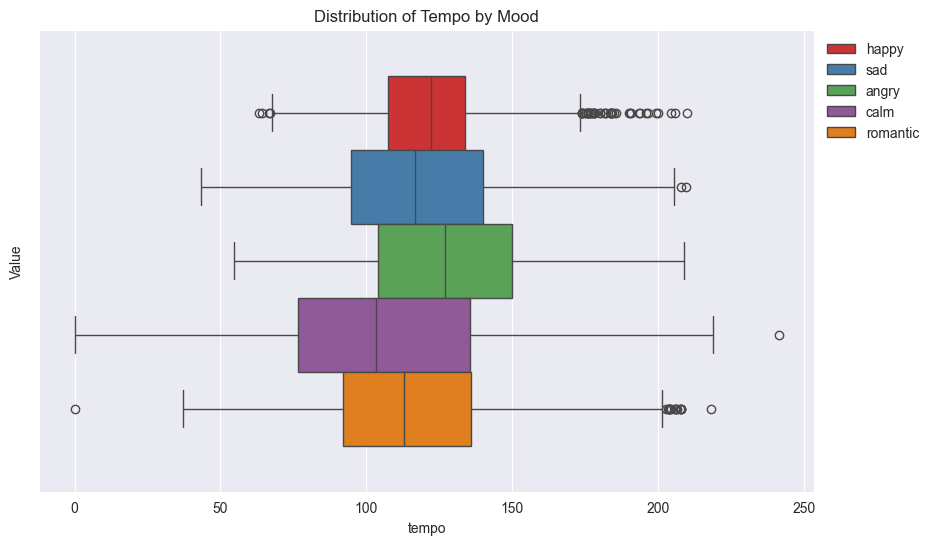

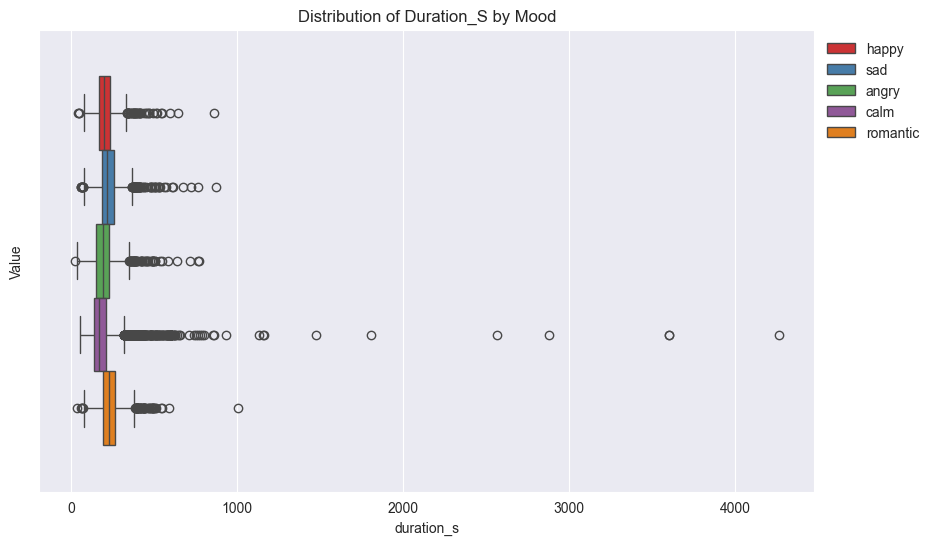

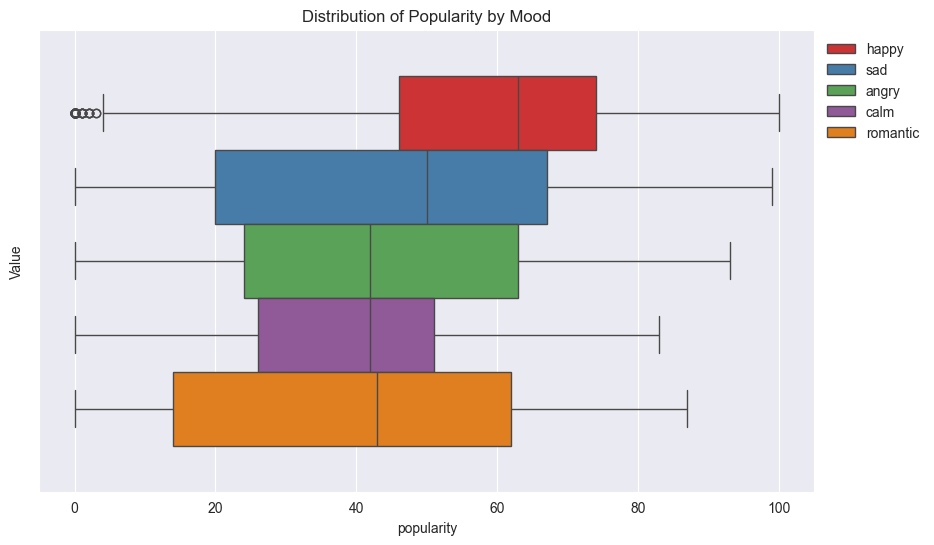

In [9]:
create_visualization(track_df, sns.boxplot, hue='mood', palette='Set1')

In [10]:
track_df.to_csv('/Users/bryanzhang/Desktop/career/projects/harmonic_horizons/data/cleaned_tracks2.csv')